In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
ratings = pd.read_csv("./ml-latest-small/ratings.csv")
ratings[ratings.userId==1].head(20)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
movies = pd.read_csv('./ml-latest/movies.csv', encoding='latin-1')
print (movies.shape)
movies.head()

(58098, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
num_users = ratings.userId.unique().shape[0]
num_items = ratings.movieId.unique().shape[0]
num_users, num_items

(610, 9724)

In [5]:
from sklearn import model_selection as ms
train_set, test_set = ms.train_test_split(ratings, test_size=0.25)
len(train_set), len(test_set)

(75627, 25209)

In [6]:
UM_matrix_ds = ratings.pivot(index='userId', columns='movieId', values='rating')
print("UM Matrix value size", UM_matrix_ds.values.size)
print("ratings value size", ratings.values.size)
print("Sparisity: {:4.2f}%".format(ratings.rating.values.size/UM_matrix_ds.values.size*100))
UM_matrix_ds.head(10)

UM Matrix value size 5931640
ratings value size 403344
Sparisity: 1.70%


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
IM_matrix_ds = ratings.pivot(index='movieId', columns='userId', values='rating')
IM_matrix_ds.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# similarity
import math
from operator import itemgetter
from scipy.spatial import distance

def distance_cosine(a,b):
    return 1-distance.cosine(a,b)

def disance_corr(a,b):
    return 1-distance.correlation(a,b)

def distance_euclidean(a,b):
    return 1/(distance.euclidean(a,b)+1)

In [9]:
def nearest_neighbor_user(user, topN, simFunc) :  
    u1 = UM_matrix_ds.loc[user].dropna()
    ratedIndex = u1.index
    nn = {}
    
    # Brute-Force Compute
    for uid, row in UM_matrix_ds.iterrows():
        interSectionU1 = []
        interSectionU2 = []
        if uid==user:
            continue
            
        for i in ratedIndex:
            if False==math.isnan(row[i]):
                interSectionU1.append(u1[i])
                interSectionU2.append(row[i])
        interSectionLen = len(interSectionU1)
        
        # at least 3 intersection items
        if interSectionLen < 3 :
            continue
            
        # similarity functon
        sim = simFunc(interSectionU1, interSectionU2)
        
        if  math.isnan(sim) == False:
            nn[uid] = sim
            
    # top N returned         
    return sorted(nn.items(),key=itemgetter(1),reverse=True)[:(topN+1)]

In [10]:
def nearest_neighbor_item(movie, topN, simFunc):
    m1 = UM_matrix_ds[movie].dropna()
    user_index = m1.index
    nn = {}
    
    for movieId, col in UM_matrix_ds.iteritems():
        interSectionU1 = []
        interSectionU2 = []
        if movie == movieId:
            continue
        
        for i in user_index:
            if False==math.isnan(col[i]):
                interSectionU1.append(m1[i])
                interSectionU2.append(col[i])
        interSectionLen = len(interSectionU1)
        
        # at least 3 intersection items
        if interSectionLen < 3:
            continue
            
        # similarity functon
        sim = simFunc(interSectionU1, interSectionU2)
        
        if  math.isnan(sim) == False:
            nn[movieId] = sim
            
    # top N returned         
    return sorted(nn.items(),key=itemgetter(1),reverse=True)[:(topN+1)]

In [11]:
print(pd.DataFrame(nearest_neighbor_user(278, 100, distance_euclidean), columns=['userId', 'sim']))
print(pd.DataFrame(nearest_neighbor_item(1, 100, distance_euclidean), columns=['movieId', 'sim']))

     userId       sim
0         8  1.000000
1        15  1.000000
2       348  1.000000
3       352  1.000000
4       373  1.000000
5       382  1.000000
6       512  1.000000
7       566  1.000000
8       601  1.000000
9       602  1.000000
10        1  0.666667
11      296  0.666667
12      338  0.666667
13      484  0.666667
14      515  0.666667
15      572  0.666667
16       17  0.585786
17       59  0.585786
18       72  0.585786
19      178  0.585786
20      232  0.585786
21      254  0.585786
22      280  0.585786
23      282  0.585786
24      330  0.585786
25      343  0.585786
26      415  0.585786
27      418  0.585786
28      489  0.585786
29      587  0.585786
..      ...       ...
71      200  0.387426
72      202  0.387426
73      219  0.387426
74      239  0.387426
75      249  0.387426
76      152  0.376179
77      420  0.376179
78      590  0.376179
79      356  0.366025
80      105  0.356789
81      318  0.356789
82      434  0.356789
83      452  0.356789
84      55

In [12]:
def predictRating(id_num, nn=50, simFunc=distance_euclidean, kind = 'user') :
   
    if (kind == "user"):
        ## neighboorhood 
        neighbor = nearest_neighbor_user(id_num, nn, simFunc)
        # userid: dictionary of similarity

        neighbor_id = [id for id, sim in neighbor]
        # List of similar similarities

        ## Remove if four or more are NaN
        neighbor_movie = UM_matrix_ds.loc[neighbor_id].dropna(1, how = 'all', thresh = 2)
        # User id x DataFrame of movie id. However, if the NaN of the column is 4 or more, it is deleted.

        neighbor_dic = dict(neighbor)
        ret = [] 
        #['movieId', 'predictedRate']

        # iterate through each column key: userid, column: movieid, value: rating
        for movieId, row in neighbor_movie.iteritems():
            jsum, wsum = 0, 0
            for v in row.dropna().iteritems():
                sim = neighbor_dic.get(v[0],0)
                jsum += sim
                wsum += (v[1]*sim)
            ret.append([movieId, wsum/jsum])

        return ret
    
    elif (kind == 'item'):
        neighbor = nearest_neighbor_item(id_num, nn, simFunc)
        
        neighbor_id = [id for id, sim in neighbor]
        
        neighbor_ratedUser = UM_matrix_ds[neighbor_id].dropna(0, how = 'all', thresh = 2)
        
        neighbor_dic = dict(neighbor)
        ret = []
        
        for userId, row in neighbor_ratedUser.iterrows():
            jsum, wsum = 0, 0
            for v in row.dropna().iteritems():
                sim = neighbor_dic.get(v[0], 0)
                jsum += sim
                wsum += (v[1]*sim)
            ret.append([userId, wsum/jsum])
        
        return ret
        

In [13]:
# predictRating(1, 100, kind = 'user')
predictRating(1, 50, kind = 'item')

[[50, 3.333333333333333],
 [51, 4.25],
 [66, 4.0],
 [103, 4.25],
 [105, 4.333333333333333],
 [125, 4.0],
 [140, 3.1169278186182687],
 [182, 4.096214921515367],
 [186, 4.0],
 [199, 3.5],
 [202, 4.0],
 [221, 3.652618519826359],
 [249, 4.4],
 [260, 4.467711274473075],
 [274, 3.815300968740935],
 [275, 5.0],
 [290, 4.0],
 [313, 4.0],
 [318, 3.1249999999999996],
 [325, 4.0],
 [368, 3.0],
 [377, 3.75],
 [380, 4.999999999999999],
 [387, 3.5739934013937824],
 [414, 3.980591134835224],
 [422, 4.0],
 [469, 4.0],
 [474, 3.7895693619823407],
 [479, 4.2],
 [483, 3.9677112744730745],
 [489, 3.766144362763463],
 [509, 4.0],
 [514, 4.0],
 [534, 4.0],
 [555, 4.0],
 [590, 4.0],
 [597, 4.0],
 [599, 2.8977036061322035],
 [600, 2.4677112744730745],
 [603, 4.0],
 [606, 2.6348760716949085]]

In [14]:
## view rated movies and movies with high ratings
def ratingMovies(user_id):
    ds = pd.merge(ratings[ratings.userId==user_id], movies, on=['movieId'])
    return ds.sort_values(by=['rating'], ascending=False)[['rating','title','genres','movieId']].head(100)
ratingMovies(1).head()

,rating,title,genres,movieId
231,5.0,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,5060
185,5.0,Excalibur (1981),Adventure|Fantasy,2872
89,5.0,Indiana Jones and the Last Crusade (1989),Action|Adventure,1291
90,5.0,Pink Floyd: The Wall (1982),Drama|Musical,1298
190,5.0,From Russia with Love (1963),Action|Adventure|Thriller,2948


In [15]:
def join_movie_info(predicted_result, movie = 1, kind = 'user'):
    if (kind == 'user'):
        predicted_ratings = pd.DataFrame(predicted_result, columns=['movieId', 'predicted_rating'])
        result_ds = pd.merge(movies[movies.movieId > 0], predicted_ratings, on=['movieId'])
        return result_ds.sort_values(by=['predicted_rating'], ascending=False)
    
    elif (kind == 'item'):
        predicted_ratings = pd.DataFrame(predicted_result, columns=['userId', 'predicted_rating'])
        return predicted_ratings.sort_values(by=['predicted_rating'], ascending=False)
    
result_user = predictRating(50, kind = 'user') # prediction of user #50
result_item = predictRating(1, kind = 'item') # prediction of movie #1
join_movie_info(result_user, kind = 'user').head(10)

,movieId,title,genres,predicted_rating
35,76,Screamers (1995),Action|Sci-Fi|Thriller,5.000000
288,3499,Misery (1990),Drama|Horror|Thriller,4.795540
236,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.768673
233,1213,Goodfellas (1990),Crime|Drama,4.712773
247,1358,Sling Blade (1996),Drama,4.543199
147,541,Blade Runner (1982),Action|Sci-Fi|Thriller,4.542570
298,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,4.540473
221,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,4.516075
262,1961,Rain Man (1988),Drama,4.514331
255,1673,Boogie Nights (1997),Drama,4.512385


In [16]:
join_movie_info(result_item, kind = 'item').head(10)

,userId,predicted_rating
15,275,5.000000
22,380,5.000000
13,260,4.467711
12,249,4.400000
4,105,4.333333
1,51,4.250000
3,103,4.250000
28,479,4.200000
7,182,4.096215
36,597,4.000000


In [17]:
# 5th user's star rating
userId=1
pd.merge(ratingMovies(userId), join_movie_info(predictRating(userId)), 
         on=['movieId'], how='right').sort_values(by=['predicted_rating'], ascending =False)

,rating,title_x,genres_x,movieId,title_y,genres_y,predicted_rating
25,NaN,NaN,NaN,3996,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance,5.000000
35,NaN,NaN,NaN,1982,Halloween (1978),Horror,5.000000
34,NaN,NaN,NaN,6502,28 Days Later (2002),Action|Horror|Sci-Fi,5.000000
1,5.0,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,5.000000
33,NaN,NaN,NaN,1203,12 Angry Men (1957),Drama,5.000000
7,5.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,5.000000
32,NaN,NaN,NaN,923,Citizen Kane (1941),Drama|Mystery,5.000000
31,NaN,NaN,NaN,381,When a Man Loves a Woman (1994),Drama|Romance,5.000000
30,NaN,NaN,NaN,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,5.000000
29,NaN,NaN,NaN,25,Leaving Las Vegas (1995),Drama|Romance,5.000000


In [18]:
eval_ratings = ratings

def eval_prediction(predict_users, n_users=50, kind = 'user'):
    if (kind == 'user'):
        ## evaluation
        ds = pd.merge(eval_ratings, ratings[['movieId','rating']].groupby(['movieId']).mean().reset_index(), 
                      on='movieId', how='left')

        ds = ds.rename(columns= {'rating_x':'rating', 'rating_y':'mean_rating'})
        st = time.time()
        ## udpate to predict_rating 
        user_distance_functions = [('user_euclidean',distance_euclidean), ('user_cosine', distance_cosine)]
        for name, func in user_distance_functions:
            ds[name] = 0
            for user_id in predict_users:
                # key: movie id, value : predicted_rating
                for x in predictRating(user_id, n_users, func):
                    ds.loc[(ds.userId==user_id) & (ds.movieId==x[0]),name]=x[1]
        #Only the tuple corresponding to the user performing the predict in the entire dataFrame is returned
        return ds[ds.user_euclidean+ds.user_cosine >0]

                    
    elif (kind == 'item'):
        ## evaluation
        ds = pd.merge(eval_ratings, ratings[['movieId','rating']].groupby(['movieId']).mean().reset_index(), 
                      on='movieId', how='left')

        ds = ds.rename(columns= {'rating_x':'rating', 'rating_y':'mean_rating'})
        st = time.time()
        ## udpate to predict_rating 
        item_distance_functions = [('item_euclidean', distance_euclidean), ('item_cosine', distance_cosine)]
    
    print('runtime', round(time.time()-st,2), 'sec')
    

In [19]:
## all userId list 
users = UM_matrix_ds.index.tolist()
## 10-person star rating
predicted_user = eval_prediction(users[:50], 100, kind = 'user')

predicted_user = predicted_user[(predicted_user['user_cosine'] > 0) & (predicted_user['user_euclidean'] > 0)]

def RMSE(X, left_col, right_col):
    return(np.sqrt(np.mean((X[left_col] - X[right_col])**2)))

def MAE(X, left_col, right_col):
    return(np.mean(np.absolute(X[left_col] - X[right_col])) )

for name in ['mean_rating', 'user_cosine', 'user_euclidean']:
    print ("MAE of {0} is {1} ".format(name, MAE(predicted_user, 'rating', name)))

for name in ['mean_rating', 'user_cosine', 'user_euclidean']:
    print ("RMSE of {0} is {1} ".format(name, RMSE(predicted_user, 'rating', name)))

MAE of mean_rating is 0.7206514353746601 
MAE of user_cosine is 0.6456093282014186 
MAE of user_euclidean is 0.5729548781339047 
RMSE of mean_rating is 0.9231515232433154 
RMSE of user_cosine is 0.8408473218220016 
RMSE of user_euclidean is 0.7618379876029429 


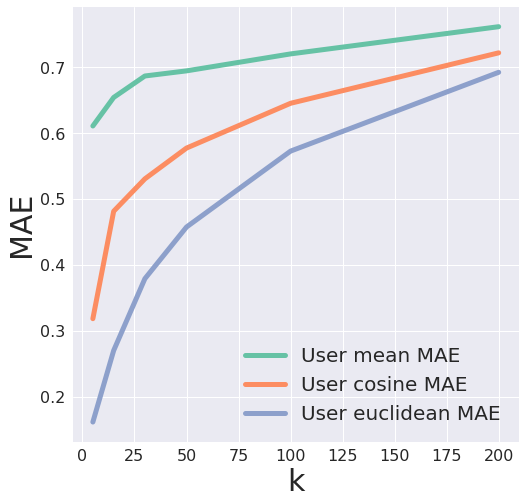

In [20]:
k_array = [5, 15, 30, 50, 100, 200]
user_mean_MAE = []
user_mean_RMSE = []
user_cosine_MAE = []
user_cosine_RMSE = []
user_euc_MAE = []
user_euc_RMSE = []

for k in k_array:
    predicted_user = eval_prediction(users[:50], k, kind = 'user')

    predicted_user = predicted_user[(predicted_user['user_cosine'] > 0) & (predicted_user['user_euclidean'] > 0)]
    
    for name in ['mean_rating', 'user_cosine', 'user_euclidean']:
        if (name == 'mean_rating'):
            user_mean_MAE.append(MAE(predicted_user, 'rating', name))
            user_mean_RMSE.append(RMSE(predicted_user, 'rating', name))
        elif (name == 'user_cosine'):
            user_cosine_MAE.append(MAE(predicted_user, 'rating', name))
            user_cosine_RMSE.append(RMSE(predicted_user, 'rating', name))
        elif (name == 'user_euclidean'):
            user_euc_MAE.append(MAE(predicted_user, 'rating', name))
            user_euc_RMSE.append(RMSE(predicted_user, 'rating', name))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pal = sns.color_palette("Set2", 3)
plt.figure(figsize=(8, 8))
plt.plot(k_array, user_mean_MAE, c=pal[0], label='User mean MAE', linewidth=5)
plt.plot(k_array, user_cosine_MAE, c=pal[1], label='User cosine MAE', linewidth=5)
plt.plot(k_array, user_euc_MAE, c=pal[2], label='User euclidean MAE', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('MAE', fontsize=30);

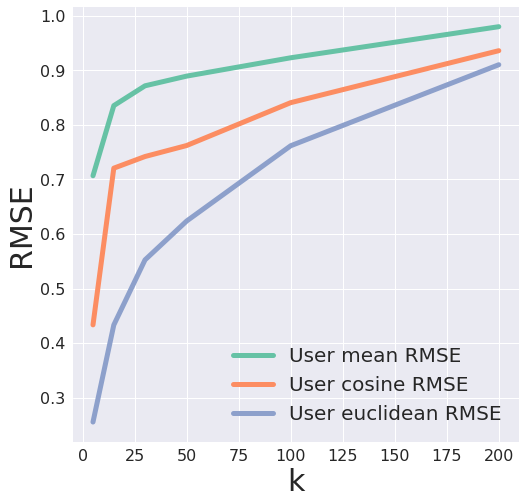

In [21]:
sns.set()

pal = sns.color_palette("Set2", 3)
plt.figure(figsize=(8, 8))
plt.plot(k_array, user_mean_RMSE, c=pal[0], label='User mean RMSE', linewidth=5)
plt.plot(k_array, user_cosine_RMSE, c=pal[1], label='User cosine RMSE', linewidth=5)
plt.plot(k_array, user_euc_RMSE, c=pal[2], label='User euclidean RMSE', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('RMSE', fontsize=30);